<a href="https://colab.research.google.com/github/RakshithaK2001/Hackathon-Heart_disease/blob/main/Hackathon(Heart_Disease).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2022-05-29 09:56:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data.1’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.07s   

2022-05-29 09:56:04 (264 KB/s) - ‘processed.cleveland.data.1’ saved [18461/18461]



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

In [54]:
df=pd.read_csv(r'/content/processed.cleveland.data', encoding = 'latin1',names=['age',
'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','output_val'])

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output_val
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output_val
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [81]:
df['output_val'].replace(to_replace=[1,2,3,4],value=1,inplace=True)

In [82]:
df['output_val'].unique()

array([0, 1])

In [83]:
df['output_val'].value_counts()

0    160
1    137
Name: output_val, dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         297 non-null    float64
 1   sex         297 non-null    float64
 2   cp          297 non-null    float64
 3   trestbps    297 non-null    float64
 4   chol        297 non-null    float64
 5   fbs         297 non-null    float64
 6   restecg     297 non-null    float64
 7   thalach     297 non-null    float64
 8   exang       297 non-null    float64
 9   oldpeak     297 non-null    float64
 10  slope       297 non-null    float64
 11  ca          297 non-null    float64
 12  thal        297 non-null    float64
 13  output_val  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 42.9 KB


In [85]:
ca_Nan_index= df.index[df.ca == '?'].tolist()
thal_Nan_index = df.index[df.thal == '?'].tolist()
drop_Nan_index = thal_Nan_index + ca_Nan_index
df = df.drop(df.index[drop_Nan_index])

In [86]:
df = df.astype({"age":'float', "sex":'float',"cp":'float',"trestbps":'float',"thalach":'float', "chol":'float',"fbs":'float',"restecg":'float',
                "exang":'float',"oldpeak":'float',"slope":'float',"ca":'float',"thal":'float'})

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         297 non-null    float64
 1   sex         297 non-null    float64
 2   cp          297 non-null    float64
 3   trestbps    297 non-null    float64
 4   chol        297 non-null    float64
 5   fbs         297 non-null    float64
 6   restecg     297 non-null    float64
 7   thalach     297 non-null    float64
 8   exang       297 non-null    float64
 9   oldpeak     297 non-null    float64
 10  slope       297 non-null    float64
 11  ca          297 non-null    float64
 12  thal        297 non-null    float64
 13  output_val  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 42.9 KB


In [88]:
import seaborn as sns

no_disease=df['output_val'].value_counts()[0]
yes_disease=df['output_val'].value_counts()[1]

print("people with disease = "+str(yes_disease))
print("people without disease = "+str(no_disease))

people with disease = 137
people without disease = 160


Text(0.5, 1.0, 'with heart disease vs. without heart disease')

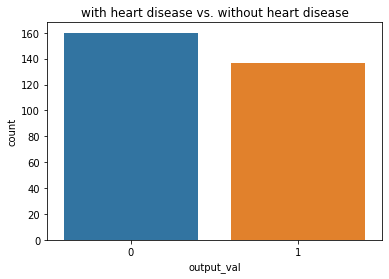

In [89]:
sns.countplot(df.output_val).set_title("with heart disease vs. without heart disease")

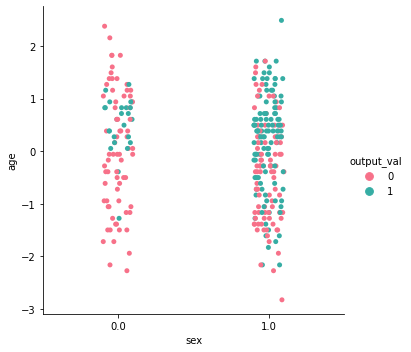

In [90]:
sns.catplot(data=df, x='sex', y='age',  hue='output_val', palette='husl')

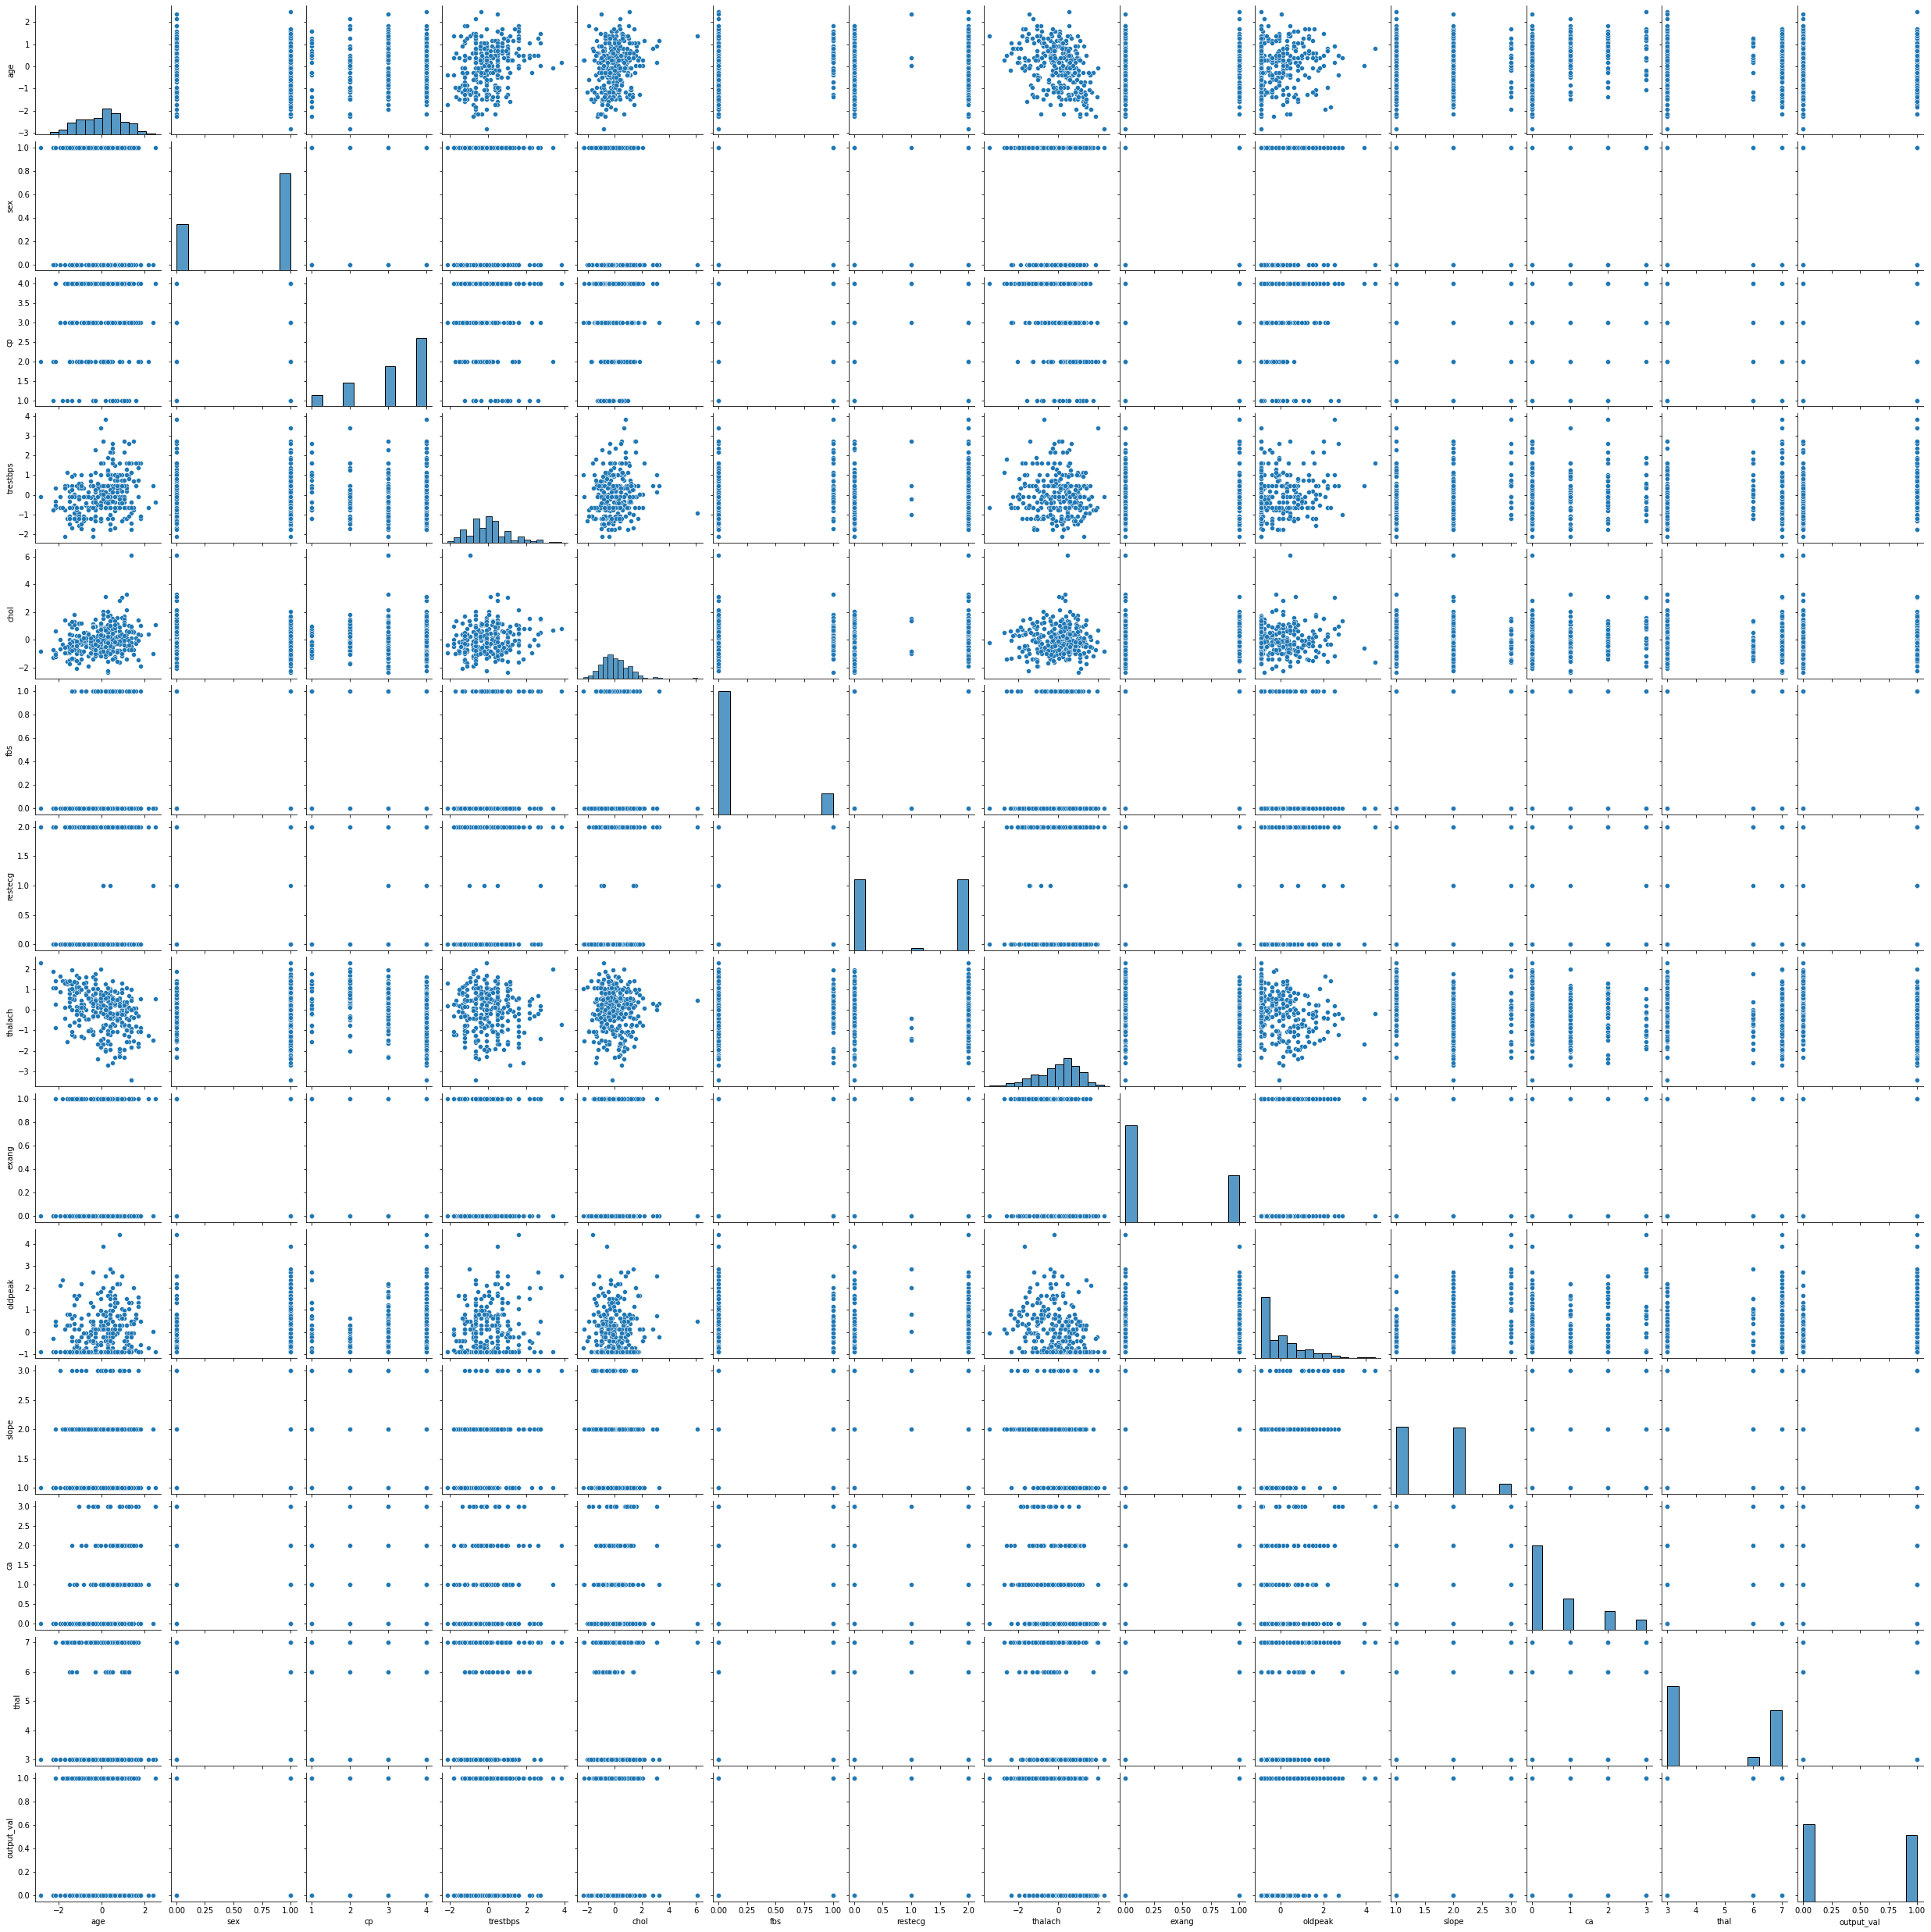

In [91]:
sns.pairplot(df)

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


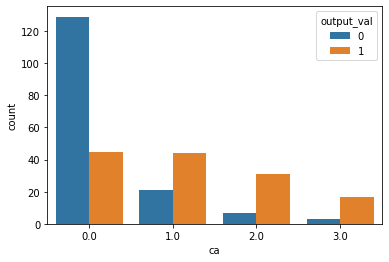

In [92]:
print(df['ca'].value_counts())
sns.countplot(x='ca',hue='output_val',data=df)

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


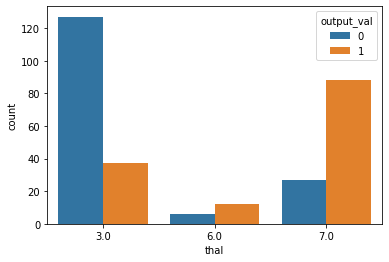

In [93]:
print(df['thal'].value_counts())
sns.countplot(x='thal',data=df, hue='output_val')

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64


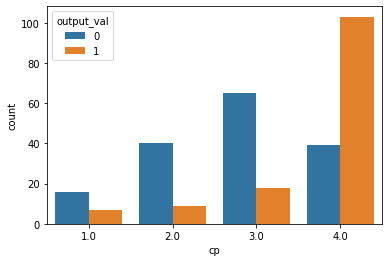

In [94]:
print(df['cp'].value_counts())
sns.countplot(x='cp' ,hue='output_val', data=df)

In [95]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output_val
0,0.936181,1.0,1.0,0.750380,-0.276443,1.0,2.0,0.017494,0.0,1.068965,3.0,0.0,6.0,0
1,1.378929,1.0,4.0,1.596266,0.744555,0.0,2.0,-1.816334,1.0,0.381773,2.0,3.0,3.0,1
2,1.378929,1.0,4.0,-0.659431,-0.353500,0.0,2.0,-0.899420,1.0,1.326662,2.0,2.0,7.0,1
3,-1.941680,1.0,3.0,-0.095506,0.051047,0.0,0.0,1.633010,0.0,2.099753,3.0,0.0,3.0,0
4,-1.498933,0.0,2.0,-0.095506,-0.835103,0.0,2.0,0.978071,0.0,0.295874,1.0,0.0,3.0,0


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
StandardScaler = StandardScaler()  
col_scale = ['age','trestbps','chol','thalach','oldpeak']
df[col_scale] = StandardScaler.fit_transform(df[col_scale])

In [98]:
x= df.drop(['output_val'], axis=1)
y= df['output_val']

In [99]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [100]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model_1=lr.fit(x_train,y_train)
pred_1=model_1.predict(x_test)

In [101]:
from sklearn.metrics import confusion_matrix

cm_1=confusion_matrix(y_test,pred_1)
cm_1

array([[27,  2],
       [ 7, 24]])

In [102]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,pred_1)
print('The accuracy of LR for test data is :'+str(score))

The accuracy of LR for test data is :0.85


The accuracy of the model is : 0.85
[[27  2]
 [ 7 24]]


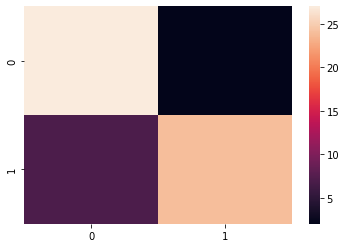

In [103]:
print("The accuracy of the model is :",score)

cm=confusion_matrix(y_test,pred_1)
print(cm)

sns.heatmap(cm)

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.92      0.77      0.84        31

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [105]:
warnings.filterwarnings(action='ignore')
case1=np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1]).reshape(1,-1)
pred=model_1.predict(case1)
if pred[0]==1:
  print("Your heart is healthy")
else:
  print("Go to a doctor soon")

Your heart is healthy
